In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [2]:
df = pd.read_csv('Downloads/tesla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

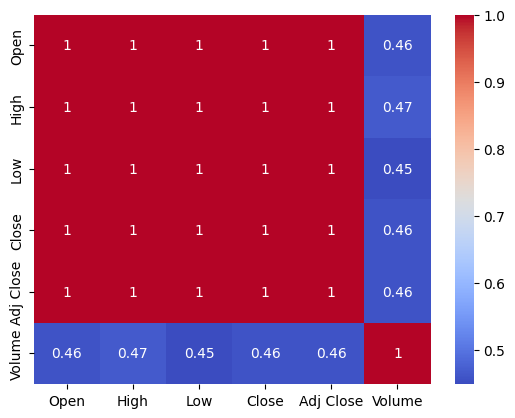

In [4]:
import seaborn as sns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [6]:
df['Date'].count()

2193

In [7]:
df['Date'].nunique()

2193

In [8]:
df['Volume'].max()

37163900

In [9]:
top_volume=df.groupby('Date')['Volume'].max().sort_values(ascending=False).head(10)
top_volume

Date
14-05-2013    37163900
28-09-2018    33649700
25-02-2014    32681700
16-07-2013    32371900
06-11-2013    31071700
07-08-2018    30875800
09-05-2013    28605000
14-01-2014    27607000
26-10-2018    27425500
08-08-2013    27246800
Name: Volume, dtype: int64

<Axes: xlabel='Date'>

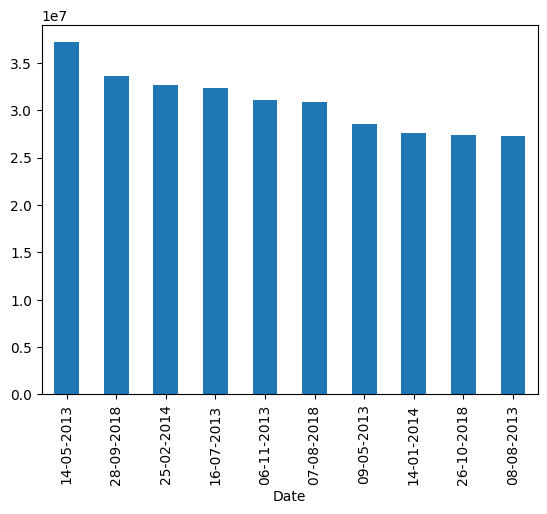

In [10]:
top_volume.plot(kind='bar')

In [11]:
top_High=df.groupby('Date')['High'].max().sort_values(ascending=False).head(10)
top_High

Date
18-09-2017    389.609985
07-08-2018    387.459991
23-06-2017    386.989990
26-06-2017    386.950012
22-06-2017    385.000000
14-06-2017    384.250000
08-08-2018    382.640015
19-09-2017    382.390015
15-09-2017    380.000000
07-12-2018    379.489990
Name: High, dtype: float64

<Axes: xlabel='Date'>

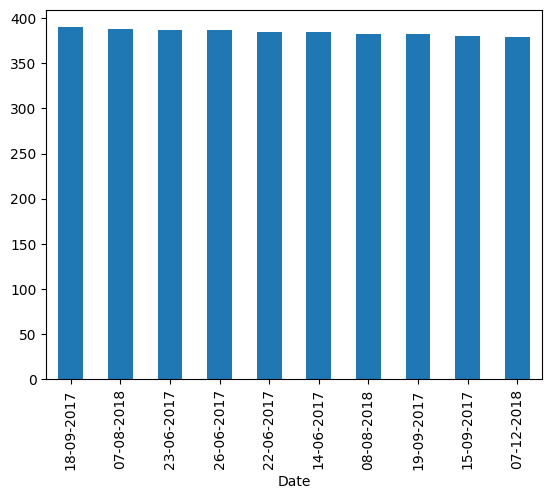

In [12]:
top_High.plot(kind='bar')

In [13]:
top_low=df.groupby('Date')['Low'].max().sort_values(ascending=False).head(10)
top_low

Date
23-06-2017    379.350006
18-09-2017    377.679993
14-06-2017    376.309998
19-09-2017    373.570007
22-06-2017    373.570007
26-06-2017    373.100006
15-09-2017    372.700012
20-09-2017    371.070007
16-06-2017    370.100006
20-06-2017    369.730011
Name: Low, dtype: float64

<Axes: xlabel='Date'>

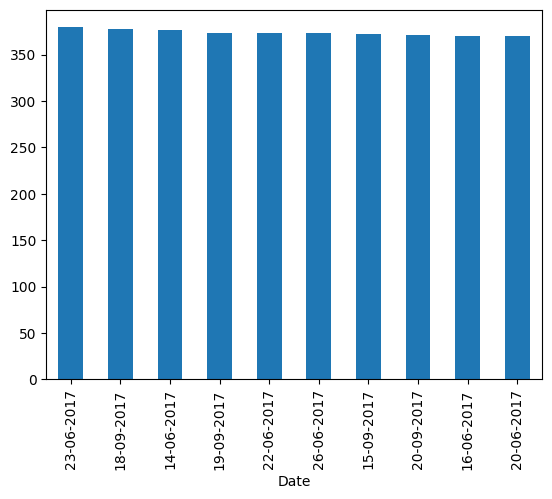

In [14]:
top_low.plot(kind='bar')

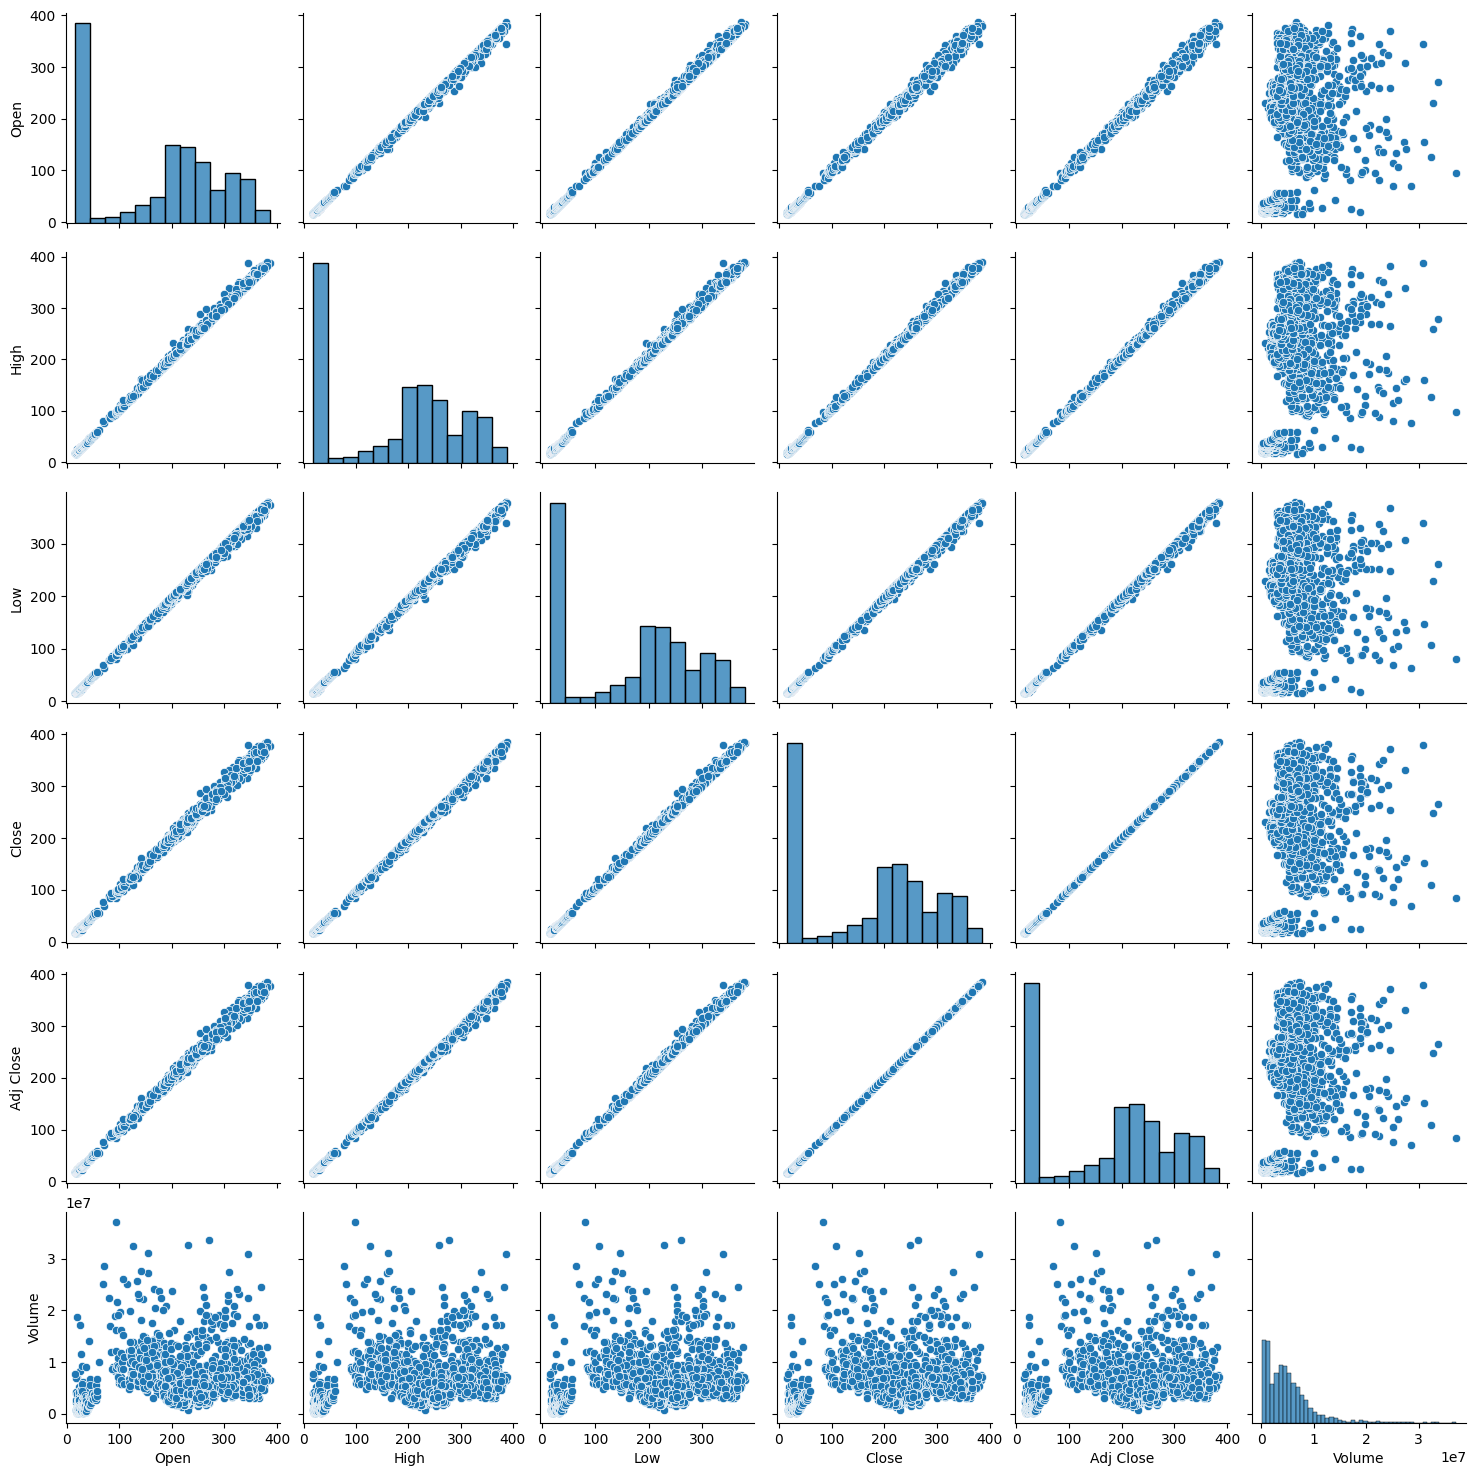

In [15]:
sns.pairplot(df)
plt.show()

<Figure size 2000x2000 with 0 Axes>

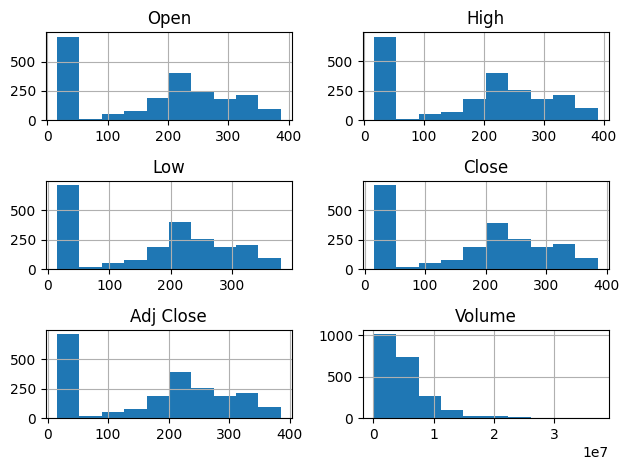

In [16]:
plt.figure(figsize=(20, 20))
df.hist()

plt.tight_layout()

plt.show()

In [17]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [19]:
data = pd.DataFrame({
    'date': pd.date_range(start='13/08/2018', periods=100, freq='D'),
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'target': np.random.randint(0, 2, 100)
})

data['date'] = pd.to_datetime(data['date'])

X = data[['date', 'feature1', 'feature2']]
y = data['target']

data['date'] = pd.to_datetime(data['date']).astype(int) / 10**9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"here: {accuracy:.2f}")

TypeError: Converting from datetime64[ns] to int32 is not supported. Do obj.astype('int64').astype(dtype) instead

In [ ]:
data = df['Close'].values
data = data.reshape(-1, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, batch_size=1, epochs=1)


In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reverse the scaling to get actual stock prices
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])


In [ ]:
# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='Actual Stock Price')
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(data) - 1, :] = test_predict

plt.plot(train_plot, label='Train Prediction')
plt.plot(test_plot, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
model.save('my_model.keras')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [ ]:
df = pd.read_csv('Downloads/Google_test_data.csv')
df.head()

In [ ]:
data = df['Close'].values
data = data.reshape(-1, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],  1)


In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reverse the scaling for the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Reverse the scaling for the actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='Actual Stock Price')

# Create empty arrays for plotting
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(data) - 1, :] = test_predict

plt.plot(train_plot, label='Train Prediction')
plt.plot(test_plot, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
model.save('my_model.keras')